                                      # Feature Engineering Techniques

# Encoding
Feature encoding is a process used to transform categorical data into numerical values that can be understood by ML algorithms. There are several types of encoding, including label encoding and one-hot encoding.

# Lets load the dataset
#### Census Income data set:
The Census Income Data set describes the income of individuals in the United States. It includes their age, sex, marital status and other demographic information as well as their annual income, which is divided into two categories: over $50,000 or under $50,000.                               

For the labelling example, we are using the “education” column of the census data set, which describes the highest level of education achieved by individuals within the population. It contains information such as whether an individual has completed high school, completed college, earned a graduate degree, or some other form of education.

In [1]:
import pandas as pd

# load dataset - census income
census_income = pd.read_csv(r'adult.csv')
census_income.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


# Label Encoding using Scikit-learn
Label encoding is the simplest way to convert categorical values into numerical values. It is a simple process of assigning a numerical value to each category.
 
You can find suitable libraries in Pandas, Scikit-Learn and Tensorflow. I am using the Scikit-Learns Label Encoder function. It is randomly assigning integers to the unique categorical values, which is the simplest way of encoding:

In [4]:
census_income["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [5]:
from sklearn import preprocessing

# define and fit LabelEncoder
le = preprocessing.LabelEncoder()
le.fit(census_income["education"])

# Use the trained LabelEncoder to label the education column
census_income["education_labeled"] = le.transform(census_income["education"])

display(census_income[["education", "education_labeled"]])

,education,education_labeled
0,HS-grad,11
1,HS-grad,11
2,Some-college,15
3,7th-8th,5
4,Some-college,15
...,...,...
32556,Some-college,15
32557,Assoc-acdm,7
32558,HS-grad,11
32559,HS-grad,11


In [6]:
census_income["education_labeled"].value_counts()

11    10501
15     7291
9      5355
12     1723
8      1382
1      1175
7      1067
0       933
5       646
14      576
6       514
2       433
10      413
4       333
3       168
13       51
Name: education_labeled, dtype: int64

This way of encoding can cause problems for some algorithms because the assigned integers do not necessarily reflect any inherent order or relationship between the categories. For example, in the case described above, the algorithm may assume that the categories Doctorate (10) and HS-grad (11) are more similar to each other than categories Doctorate (10) and Bachelor (9) and that HS-grad (11) is “higher” than Doctorate (10).

# One-Hot Encoding using Scikit-learn, Pandas and Tensorflow
One-hot encoding is a technique for converting categorical data into numerical data. It does this by creating a new binary column for each unique category in the data set and assigning a value of 1 to rows that belong to that category and a value of 0 to rows that do not.

The process of One-Hot Encoding is pretty straightforward. We could simply implement it by ourselves or use one of the existing functions. Scikit-learn has the .preprocessing.OneHotEncoder() function, Tensorflow the .one_hot() function, and Pandas the .get_dummies() function.

#### Pandas.get_dummies()

In [4]:
import pandas as pd

education_one_hot_pandas = pd.get_dummies(census_income["education"], prefix='education')
education_one_hot_pandas.head(2)

,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Sklearn.preprocessing.LabelBinarizer()

In [5]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(census_income["education"])

education_one_hot_sklearn_binar = pd.DataFrame(lb.transform(census_income["education"]), columns=lb.classes_)
education_one_hot_sklearn_binar.head(2)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### Sklearn.preprocessing.OneHotEncoder()

In [6]:
from sklearn.preprocessing import OneHotEncoder

# define and fit the OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(census_income[['education']])

# transform the data
education_one_hot_sklearn = pd.DataFrame(ohe.transform(census_income[["education"]]).toarray(), columns=ohe.categories_[0])
education_one_hot_sklearn.head(3)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


The problem with one-hot encoding is that it can lead to large and sparse datasets with high dimensionality.
                                                       
Using one-hot encoding to convert a categorical feature with 10,000 unique values into numerical data would result in the creation of 10,000 new columns in the data set, each representing a different category. This can be a problem when working with large data sets, as it can quickly consume a lot of memory and computational resources.
    
    If memory and computer power are limited, it may be necessary to reduce the number of features in the data set to avoid running into memory or performance issues.

How can we reduce dimensionality to save memory?

When doing this, it is important to try to minimize the loss of information as much as possible. This can be achieved by carefully selecting which features to retain or remove, by using techniques such as feature selection or dimensionality reduction to identify and remove redundant or irrelevant features.

Here, I am describing two possible ways how to reduce the dimensionality of your data set:

Feature Hashing                        
Principal Component Analysis (PCA) 


                            Loss of information vs. speed vs. memory

There is probably not one “perfect” solution for reducing the number of dimensions in your data set. One method may be faster but may result in the loss of a lot of information, while the other method preserves more information but requires a lot of computing resources (which may also lead to memory issues).

# Feature Hashing
Feature hashing is primarily a dimensionality reduction technique and is often used in Natural Language Processing. However, hashing can also be useful when we want to vectorize categorical features with several hundred and thousand unique categories. With hashing, we can limit the increase of dimensionality by assigning several unique values to the same hash value.
 
     → Hashing is thus a low-memory alternative to OneHotEncoding and other feature vectorizing methods.

Hashing works by applying a hash function to the features and using the hash values directly as indices, rather than building a hash table and looking up indices in it individually. The implementation in Sklearn is based on Weinberger [Weinberger et al., 2009].

#### Step 1: the categorical values are first converted to a hash value using a hash function. The implementation in Scikit-learn uses the 32-bit variant of MurmurHash3 for this. 

In [8]:
import sklearn 
import pandas as pd

# load data set
census_income = pd.read_csv(r'adult.csv')
education_feature = census_income.groupby(by=["education"]).count().reset_index()["education"].to_frame()

############################################################################################################
# Apply the hash function, here MurmurHash3 
############################################################################################################
def hash_function(row):
    return(sklearn.utils.murmurhash3_32(row.education))

education_feature["education_hash"] = education_feature.apply(hash_function, axis=1)
education_feature

,education,education_hash
0,10th,611946777
1,11th,1907886797
2,12th,960033297
3,1st-4th,-918906142
4,5th-6th,211780192
5,7th-8th,-1858991020
6,9th,1219543683
7,Assoc-acdm,-1621657589
8,Assoc-voc,334383773
9,Bachelors,-1182795914


#### Step 2: Next, we reduce the dimensionality by applying a mod function to the feature values. Using the mod function, we calculate the remainder after dividing the hash value by n_features (the number of features of the output vector).

    It is advisable to use a power of two as the n_features parameter; otherwise, the features will not map evenly to the columns.

     Example: Census Income data set →Encoding the Education column

The “Education” column of the census income dataset contains 16 unique values:

With one-hot encoding, 16 columns will be added to the dataset, each representing one of the 16 unique values.           
→ To reduce the dimensions, we set n_features to 8.

This inevitably leads to “collisions”, i.e. that different categorical values are mapped to the same hash columns. So in other words, we are assigning different values to the same bucket. Similar to what we are doing in Binning/Bucketizing (see section 3. Binning/Bucketizing). In feature hashing, we deal with collisions by simply chaining values that are assigned to the same bucket and storing them in a list (known as “separate chaining”).



In [9]:
############################################################################################################
# Apply mod function
############################################################################################################
n_features = 8

def mod_function(row):
    return(abs(row.education_hash) % n_features)

education_feature["education_hash_mod"] = education_feature.apply(mod_function, axis=1)
education_feature.head(5)

,education,education_hash,education_hash_mod
0,10th,611946777,1
1,11th,1907886797,5
2,12th,960033297,1
3,1st-4th,-918906142,6
4,5th-6th,211780192,0


#### A function that is doing the just described steps for us is the HashingVectorizer function from Scikit-learn.

# Feature Hashing using Scikit-learn
    sklearn.feature_extraction.text.HashingVectorizer

In [10]:
from sklearn.feature_extraction.text import HashingVectorizer

# define Feature Hashing Vectorizer
vectorizer = HashingVectorizer(n_features=8, norm=None, alternate_sign=False, ngram_range=(1,1), binary=True)

# fit the hashing vectorizer and transform the education column
X = vectorizer.fit_transform(education_feature["education"])

# transformed and raw column to data frame
df = pd.DataFrame(X.toarray()).assign(education = education_feature["education"])
display(df)

,0,1,2,3,4,5,6,7,education
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10th
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11th
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12th
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1st-4th
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5th-6th
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,7th-8th
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9th
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,Assoc-acdm
8,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,Assoc-voc
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Bachelors


# Binning / Bucketizing
Binning is used for both categorical and numerical data. As the name suggests, the goal is to map the values of the features to “bins” and replace the original value with the value that represents the bin.

    For example, if we had a dataset with values ranging from 0 to 100 and we wanted to group those values into bins of size 10, we might create bins for values 0–9, 10–19, 20–29 and so on.
    
In this case, the original values would be replaced with the value that represents the bin to which they belong, such as 10, 20, 30, etc. This can help visualize and analyze the data.
                            
Since we are reducing the number of unique values in the data set, it can help to:
             
prevent overfitting                                                            
increase the robustness of the model and mitigate the influence of anomalies                   
reduce the model complexity and the required resources to train the model                        
Systematic binning can help the algorithm to detect underlying patterns more easily and efficiently. It is especially helpful if we can already form a hypothesis before we are defining the bins.                              
                        
Binning can be used for both numeric and categorical values

# Bucketizing using Pandas
     To bucketize the data by age, I am defining three “buckets”:
                
young — 28 and younger                   
middle-aged — 29 to 59                                 
old-aged — 60 and older                

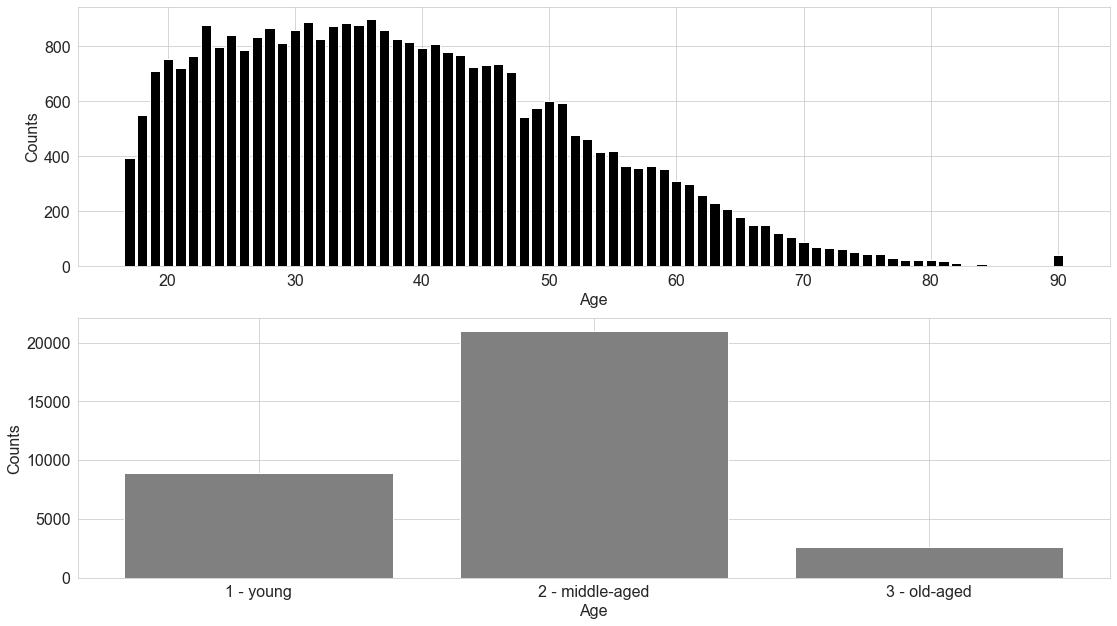

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# creating a dictionary
sns.set_style("whitegrid")
plt.rc('font', size=16) #controls default text size
plt.rc('axes', titlesize=16) #fontsize of the title
plt.rc('axes', labelsize=16) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

# load dataset - census income
census_income = pd.read_csv(r'adult.csv')

# define figure
fig, (ax1, ax2) = plt.subplots(2)
fig.set_size_inches(18.5, 10.5)

# plot age histogram
age_count = census_income.groupby(by=["age"])["age"].count()
ax1.bar(age_count.index, age_count, color='black')
ax1.set_ylabel("Counts")
ax1.set_xlabel("Age")

# binning age
def age_bins(age):
    if age < 29:
        return "1 - young"
    if age < 60 and age >= 29:
        return "2 - middle-aged"
    else:
        return "3 - old-aged"

# apply trans. function
census_income["age_bins"] = census_income["age"].apply(age_bins)

# group and count all entries in the same bin
age_bins_df = census_income.groupby(by=["age_bins"])["age_bins"].count()

ax2.bar(age_bins_df.index, age_bins_df, color='grey')
ax2.set_ylabel("Counts")
ax2.set_xlabel("Age");

# Log Transform
Logarithm transformation (or log transform) is one of the most commonly used mathematical transformations in feature engineering. What are the benefits of log transform:
                                                            
1. It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.
2. In most of the cases the magnitude order of the data changes within the range of the data. For instance, the difference between ages 15 and 20 is not equal to the ages 65 and 70. In terms of years, yes, they are identical, but for all other aspects, 5 years of difference in young ages mean a higher magnitude difference. This type of data comes from a multiplicative process and log transform normalizes the magnitude differences like that.
3. It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model become more robust.

       A critical note: The data you apply log transform must have only positive values, otherwise you receive an error. Also, you can add 1 to your data before transform it. Thus, you ensure the output of the transformation to be positive.

        Log(x+1)
           

In [18]:
import numpy as np
#Log Transform Example
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data['log+1'] = (data['value']+1).transform(np.log)
#Negative Values Handling
#Note that the values are different
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)
data

,value,log+1,log
0,2,1.098612,3.258097
1,45,3.828641,4.234107
2,-23,NaN,0.000000
3,85,4.454347,4.691348
4,28,3.367296,3.951244
5,2,1.098612,3.258097
6,35,3.583519,4.077537
7,-12,NaN,2.484907


# Normalize / Standardize
Normalizing and Standardizing are important preprocessing steps in Machine Learning. They can help algorithms to converge faster and can even increase the model accuracy.

### Normalize and Standardize using Scikit-learn
1. Scikit-learn’s MinMaxScaler scales features to a given range. It transforms features by scaling each feature to a given range between 0 and 1
2. Scikit-learn’s StandardScaler transforms data to have a mean of 0 and a standard deviation of 1

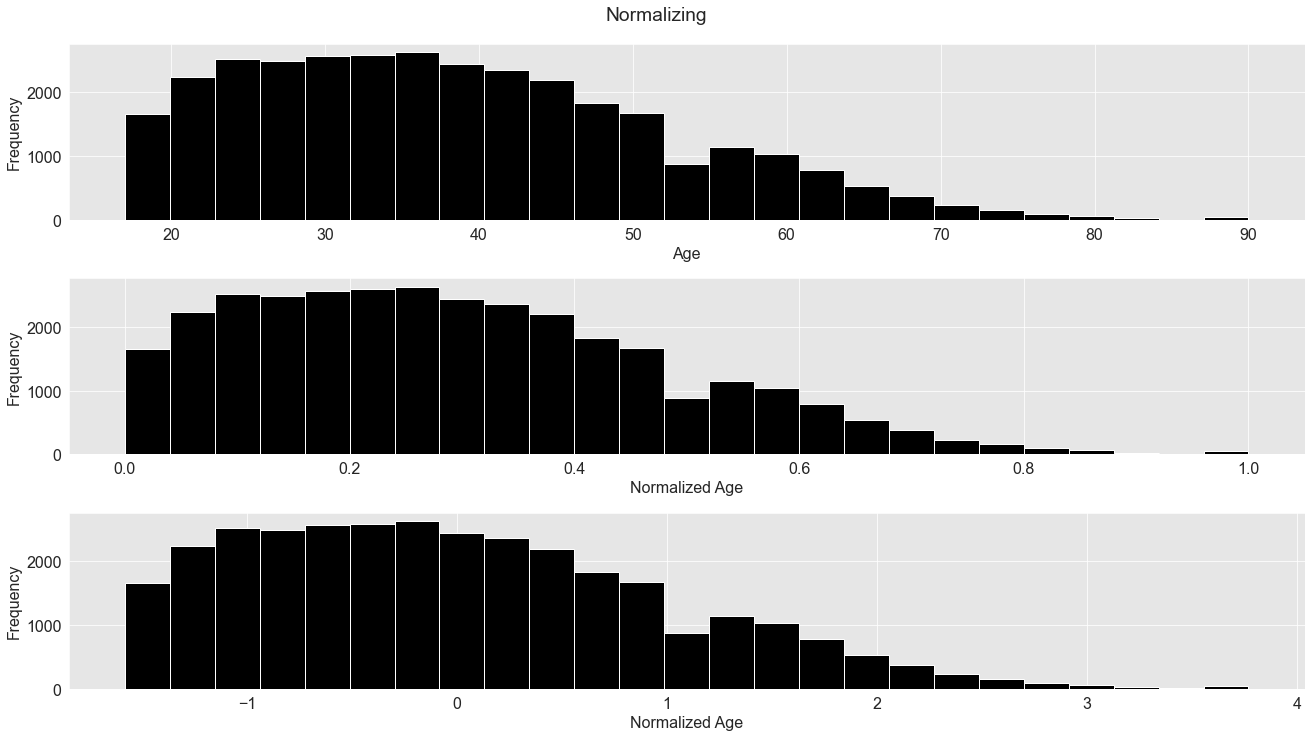

In [19]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.rcParams['font.size'] = '16'
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# load data set
census_income = pd.read_csv(r'adult.csv')

X = census_income[["age"]]

# fit scaler and transform data
X_norm = MinMaxScaler().fit_transform(X)
X_scaled = StandardScaler().fit_transform(X)

# plots
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Normalizing')
fig.set_size_inches(18.5, 10.5)

# subplot 1 - raw data
ax1.hist(X, 25, facecolor='black', ec="white")
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")

# subplot 2 - normalizer
ax2.hist(X_norm, 25, facecolor='black', ec="white")
ax2.set_xlabel("Normalized Age")
ax2.set_ylabel("Frequency")

# subplot 3 - standard scaler
ax3.hist(X_scaled, 25, facecolor='black', ec="white")
ax3.set_xlabel("Normalized Age")
ax3.set_ylabel("Frequency")

fig.tight_layout()